저는 ADP에서 EDA 문제는 말 그대로 데이터가 어떻게 생겼는지 파악하고 앞으로 어떤식으로 분석을 할 것이다~ 라고 미리 안내해주는 역할이라 생각해서, 아래 내용만 파악하고 해당 내용을 앞으로 어떻게 처리할 것인지 설명하면 된다고 생각합니다.

- 데이터 행, 열개수, 데이터타입, 결손값 파악 -> 잘못 입력된 데이터타입 변경, 결손값 보완  
- 통계량 계산 -> 스케일링, 이상치 파악  
- 시각화(히스토그램/산포도) -> 불균형 데이터 처리  
- 상관관계 파악,목적변수에 대한 데이터 분포 확인 -> 변수선택 방법 및 알고리즘 선택에 활용  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('data/problem1_houseprice.csv')
df.head()

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
0,1,8450,65.0,2003,856,854,2003,8,1,3,2,548,12.247699
1,2,9600,80.0,1976,1262,0,1976,6,1,3,2,460,12.109016
2,3,11250,68.0,2001,920,866,2002,6,1,3,2,608,12.317171
3,4,9550,60.0,1915,961,756,1970,7,1,3,3,642,11.849405
4,5,14260,84.0,2000,1145,1053,2000,9,1,4,3,836,12.429220


### 데이터 행, 열 개수, 데이터타입, 결손값 파악

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB


- 데이터의 크기, 변수의 개수 파악
- 데이터타입 파악
    - 숫자형이 문자형으로 기록된 경우: df[column name] = df[column name].astype('int' or 'float')
    - 날짜형이 문자형으로 기록된 경우: datatime 모듈 활용
- 결측값 파악 
    - ADP 문제에서 결측값에 대한 언급이 없으면 EDA에서 처리하고, 꼬리문제에 결측값처리 문제가 있으면 해당 문항에서 결측값 처리

In [14]:
## 참고1 (결측값 개수를 시리즈로 보여주기)
print(df.isnull().sum())

Id                0
LotArea           0
LotFrontage     259
YearBuilt         0
1stFlrSF          0
2ndFlrSF          0
YearRemodAdd      0
TotRmsAbvGrd      0
KitchenAbvGr      0
BedroomAbvGr      0
GarageCars        0
GarageArea        0
price             0
dtype: int64


<AxesSubplot:>

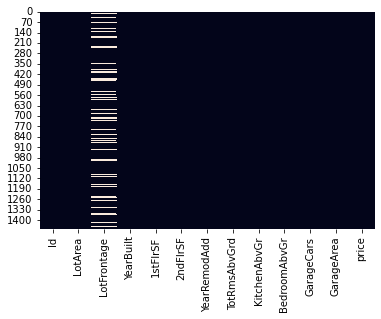

In [15]:
## 참고2 (결측값이 나타나는 패턴을 시각화하기)
sns.heatmap(df.isnull(), cbar = False)

### 통계량 계산하기

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
LotArea,1460.0,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
LotFrontage,1201.0,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
1stFlrSF,1460.0,1162.626712,386.587738,334.000000,882.000000,1087.000000,1391.250000,4692.000000
2ndFlrSF,1460.0,346.992466,436.528436,0.000000,0.000000,0.000000,728.000000,2065.000000
YearRemodAdd,1460.0,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.000000,5.000000,6.000000,7.000000,14.000000
KitchenAbvGr,1460.0,1.046575,0.220338,0.000000,1.000000,1.000000,1.000000,3.000000
BedroomAbvGr,1460.0,2.866438,0.815778,0.000000,2.000000,3.000000,3.000000,8.000000


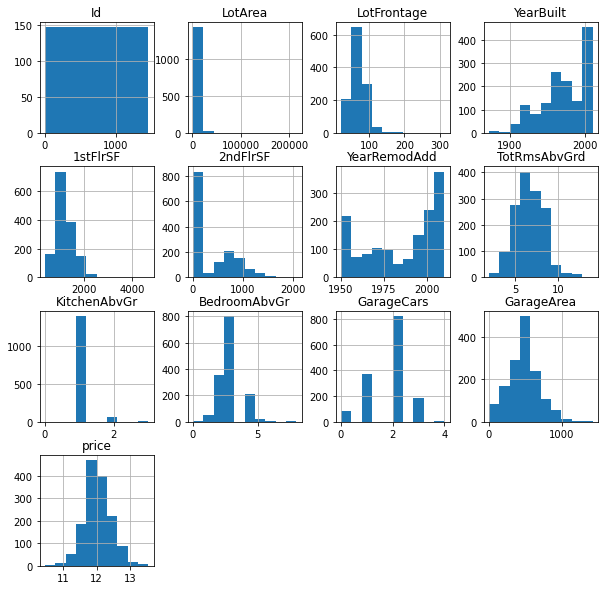

In [25]:
df.hist(figsize = (10,10))
plt.show()

- 범주형일수도 있는 데이터: KitchenAbvGr,GarageCars, BedroomAbvGr (여기서는 범주형은 아님)
- 단위 확인하고 스케일링 필요성 확인: 현재 데이터에서 스케일링 필요성 확인됨

### 변수 간 관계 확인

1. 연속형 변수들 사이의 상관계수 확인  
- 모델 적합 이전에 변수선택/차원축소를 어떻게 진행할지 생각해볼 수 있음
- 상관성이 높은 변수들은 의미에 맞게 합치거나 삭제
- 또는 그러한 변수들이 많다면 차원축소를 이용해 X의 개수를 줄임

In [26]:
df.corr().style.background_gradient().set_properties(**{'font-size':'10pt'})

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
Id,1.000000,-0.033226,-0.010601,-0.012713,0.010496,0.005590,-0.021998,0.027239,0.002951,0.037719,0.016570,0.017634,-0.017942
LotArea,-0.033226,1.000000,0.426095,0.014228,0.299475,0.050986,0.013788,0.190015,-0.017784,0.119690,0.154871,0.180403,0.257320
LotFrontage,-0.010601,0.426095,1.000000,0.123349,0.457181,0.080177,0.088866,0.352096,-0.006069,0.263170,0.285691,0.344997,0.355879
YearBuilt,-0.012713,0.014228,0.123349,1.000000,0.281986,0.010308,0.592855,0.095589,-0.174800,-0.070651,0.537850,0.478954,0.586570
1stFlrSF,0.010496,0.299475,0.457181,0.281986,1.000000,-0.202646,0.240379,0.409516,0.068101,0.127401,0.439317,0.489782,0.596981
2ndFlrSF,0.005590,0.050986,0.080177,0.010308,-0.202646,1.000000,0.140024,0.616423,0.059306,0.502901,0.183926,0.138347,0.319300
YearRemodAdd,-0.021998,0.013788,0.088866,0.592855,0.240379,0.140024,1.000000,0.191740,-0.149598,-0.040581,0.420622,0.371600,0.565608
TotRmsAbvGrd,0.027239,0.190015,0.352096,0.095589,0.409516,0.616423,0.191740,1.000000,0.256045,0.676620,0.362289,0.337822,0.534422
KitchenAbvGr,0.002951,-0.017784,-0.006069,-0.174800,0.068101,0.059306,-0.149598,0.256045,1.000000,0.198597,-0.050634,-0.064433,-0.147548
BedroomAbvGr,0.037719,0.119690,0.263170,-0.070651,0.127401,0.502901,-0.040581,0.676620,0.198597,1.000000,0.086106,0.065253,0.209043


2. 범주형 변수들과 Y의 관계 확인
- Boxplot을 이용해 범주형 변수가 Y에 어떤 영향을 주고 있는지 파악한다

In [27]:
### 가상의 카테고리를 만들어서 예시로 진행하겠습니다 (YearBuilt가 1970년 이전인지 이후인지 나타내는 카테고리)
df.loc[df['YearBuilt']>1970, 'After1970'] = 1
df.loc[df['YearBuilt']<=1970, 'After1970'] = 0

<AxesSubplot:xlabel='After1970', ylabel='price'>

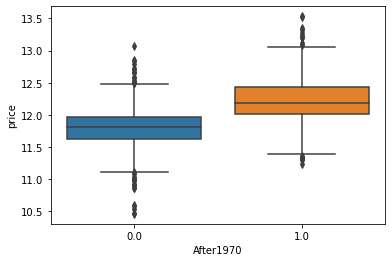

In [28]:
sns.boxplot(x='After1970', y = 'price', data = df)

추가) 이 데이터에는 해당사항이 없어서 pass했지만 Y값이 범주형 데이터이고 불균형상태라면 해당 사항을 고려해서 sampling을 하겠다는 식의 이야기가 추가되면 좋을 것 같습니다.